In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import joblib
import random
import os

In [2]:
data_path = "/home/data/m5data"

calender = pd.read_csv(os.path.join(data_path,'calendar.csv'))
sales_train_evalutaion = pd.read_csv(os.path.join(data_path,'sales_train_evaluation.csv'))
sales_train_validation = pd.read_csv(os.path.join(data_path,'sales_train_validation.csv'))
sample_submission = pd.read_csv(os.path.join(data_path,'sample_submission.csv'))
sell_prices = pd.read_csv(os.path.join(data_path,'sell_prices.csv'))

In [3]:
import copy

df = copy.deepcopy(sales_train_evalutaion)

In [4]:
# Transform the dataframe to have dates as rows instead of columns
df = df.melt(id_vars=["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"], 
             var_name="d", value_name="sales")

# Convert 'd' to a datetime type
df['d'] = pd.to_datetime(df['d'].apply(lambda x: x[2:]).astype(int), origin='2011-01-29')

# Let's forecast sales for a single item in a single store
df = df[(df['store_id']=='CA_1') & (df['item_id']=='HOBBIES_1_001')]

df = df.rename(columns = {'d':'ds', 'sales':'y'})


In [15]:
from prophet import Prophet

In [16]:
m = Prophet(daily_seasonality=True)
m.fit(df)

08:08:22 - cmdstanpy - INFO - Chain [1] start processing
08:08:22 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Create dataframe for future predictions
future = m.make_future_dataframe(periods=30)

# Make predictions
forecast = m.predict(future)

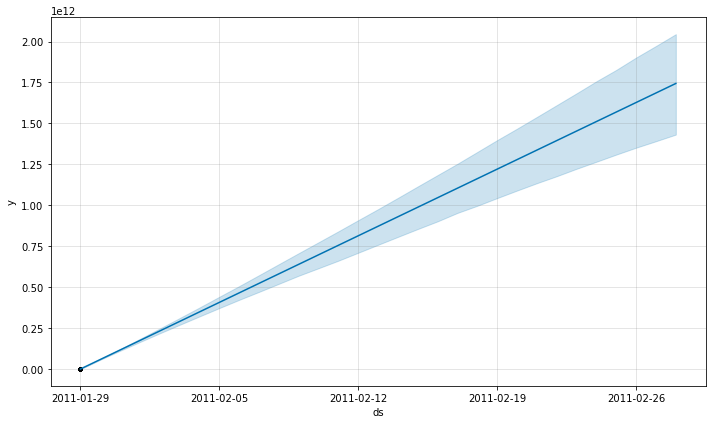

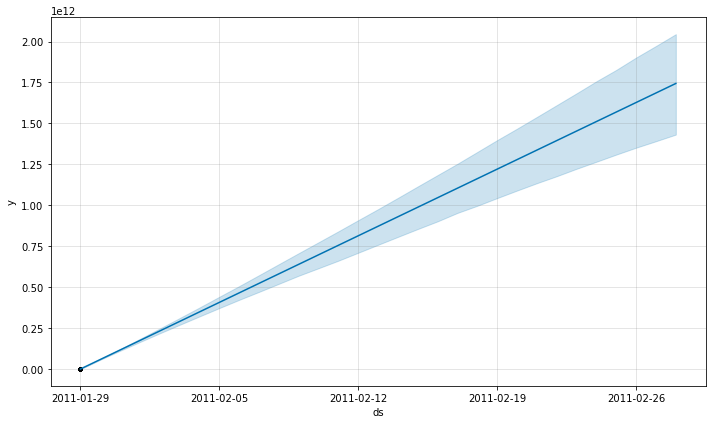

In [18]:
m.plot(forecast)

In [20]:
from sklearn.metrics import mean_absolute_error

actual = df['y'][-28:]
predicted = forecast['yhat'][-28:]

mae = mean_absolute_error(actual, predicted)
print('MAE: ', mae)

MAE:  959104032627.5643


In [21]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,ds,y
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-29 00:00:00.000000001,0
30490,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-29 00:00:00.000000002,0
60980,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-29 00:00:00.000000003,0
91470,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-29 00:00:00.000000004,0
121960,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2011-01-29 00:00:00.000000005,0
